#### Mini Project III -- Behavior data prep

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

### Accounts

In [290]:
_acct = pd.read_csv('data/twm_accounts.csv', sep=';')
print(_acct.shape)
print('unique cust_id ', _acct.cust_id.unique().shape[0])
print('unique acct_nbr ', _acct.acct_nbr.unique().shape[0])
_acct.head()

(1409, 8)
unique cust_id  665
unique acct_nbr  1409


,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
0,13628063,1362806,SV,Y,10.12.1995,NaN,1430.22,284.58
1,4561143213627090,1362709,CC,Y,15.3.1993,NaN,266.34,496.15
2,4561143213628360,1362836,CC,Y,18.3.1992,NaN,55.90,1000.00
3,13633112,1363311,CK,Y,6.7.1995,NaN,11017.13,968.46
4,4561143213633610,1363361,CC,Y,17.6.1994,NaN,849.37,462.28


In [291]:
_acct.isnull().describe()

,acct_nbr,cust_id,acct_type,account_active,acct_start_date,acct_end_date,starting_balance,ending_balance
count,1409,1409,1409,1409,1409,1409,1409,1409
unique,1,1,1,1,1,2,1,1
top,False,False,False,False,False,True,False,False
freq,1409,1409,1409,1409,1409,1266,1409,1409


In [292]:
df_acct = _acct.drop(_acct[_acct.account_active == 'N '].index, axis=0)
df_acct.drop(['account_active', 'acct_start_date', 'acct_end_date'], axis=1, inplace=True)
print(df_acct.shape)
df_acct.head()

(1266, 5)


,acct_nbr,cust_id,acct_type,starting_balance,ending_balance
0,13628063,1362806,SV,1430.22,284.58
1,4561143213627090,1362709,CC,266.34,496.15
2,4561143213628360,1362836,CC,55.90,1000.00
3,13633112,1363311,CK,11017.13,968.46
4,4561143213633610,1363361,CC,849.37,462.28


In [293]:
df_acct['spending'] = df_acct.ending_balance - df_acct.starting_balance
df_acct.head()

,acct_nbr,cust_id,acct_type,starting_balance,ending_balance,spending
0,13628063,1362806,SV,1430.22,284.58,-1145.64
1,4561143213627090,1362709,CC,266.34,496.15,229.81
2,4561143213628360,1362836,CC,55.90,1000.00,944.10
3,13633112,1363311,CK,11017.13,968.46,-10048.67
4,4561143213633610,1363361,CC,849.37,462.28,-387.09


In [294]:
df_acct = df_acct[['acct_nbr', 'cust_id', 'acct_type', 'spending']].sort_values(by=['acct_nbr'])
df_acct.replace(
    {'acct_type': {'CK  ': 1, 'SV  ': 2, 'CC  ': 3}},
    inplace=True
)
print(df_acct.shape)
df_acct.head()

(1266, 4)


,acct_nbr,cust_id,acct_type,spending
1012,13624802,1362480,1,-244.99
1399,13624803,1362480,2,480.88
252,13624842,1362484,1,-2518.14
677,13624843,1362484,2,1927.41
1348,13624852,1362485,1,-164.29


### Transactions

In [295]:
_tran = pd.read_csv('data/twm_transactions.csv', sep=';')
print(_tran.shape)
print('unique tran_id ', _tran.tran_id.unique().shape[0])
print('unique acct_nbr ', _tran.acct_nbr.unique().shape[0])
_tran.head()

(77580, 10)
unique tran_id  155
unique acct_nbr  1398


,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
0,27,13625623,0.00,0.00,0.0,3753.34,21.10.1995,121656,A,IQ
1,97,13628392,0.00,0.00,0.0,254.49,5.2.1995,153053,V,IQ
2,21,13630842,-97.57,-97.57,0.0,3819.56,23.7.1995,0,P,WD
3,44,13631412,-0.15,-0.15,0.0,224.05,30.1.1995,0,,FK
4,31,13625722,0.00,0.00,0.0,240.55,25.1.1995,204521,B,IQ


In [296]:
_tran.isnull().describe()

,tran_id,acct_nbr,tran_amt,principal_amt,interest_amt,new_balance,tran_date,tran_time,channel,tran_code
count,77580,77580,77580,77580,77580,77580,77580,77580,77580,77580
unique,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False
freq,77580,77580,77580,77580,77580,77580,77580,77580,77580,77580


In [297]:
df_tran = _tran.drop(['tran_id', 'principal_amt', 'interest_amt', 'new_balance', 'tran_date', 'tran_time', 'channel', 'tran_code'], axis=1)
print(df_tran.shape)
df_tran.describe()

(77580, 2)


,acct_nbr,tran_amt
count,7.758000e+04,77580.000000
mean,1.185674e+15,-7.748275
std,2.000564e+15,312.684674
min,1.362480e+07,-3312.410000
25%,1.362824e+07,-100.000000
50%,1.363199e+07,-1.815000
75%,4.561143e+15,0.170000
max,4.561143e+15,17464.520000


In [298]:
df_tran.groupby(by=['acct_nbr']).mean()

,tran_amt
acct_nbr,
13624802,-2.474646
13624803,18.550769
13624842,-25.435758
13624843,58.474545
13624852,-1.659495
...,...
4561143213634830,0.334805
4561143213634840,12.080513
4561143213634850,139.239565


In [299]:
_tran_acct_nbr = pd.Series(df_tran.groupby(by=['acct_nbr']).mean().index)
_tran_amt_avg = pd.Series([i[0] for i in df_tran.groupby(by=['acct_nbr']).mean().values.tolist()])

In [300]:
# df_tran[['acct_nbr', 'tran_amt']].groupby(by=['acct_nbr']).mean().index
df_tran1 = pd.DataFrame({'acct_nbr': _tran_acct_nbr, 'tran_amt_avg': _tran_amt_avg})
print(df_tran1.shape)
df_tran1.head()

(1398, 2)


,acct_nbr,tran_amt_avg
0,13624802,-2.474646
1,13624803,18.550769
2,13624842,-25.435758
3,13624843,58.474545
4,13624852,-1.659495


In [301]:
df_tran['acct_nbr'].value_counts()

4561143213630020    155
4561143213626830    141
4561143213627770    137
4561143213632490    131
4561143213629780    112
                   ... 
4561143213631460      1
4561143213626190      1
4561143213631330      1
4561143213631690      1
13629502              1
Name: acct_nbr, Length: 1398, dtype: int64

In [302]:
_tran_acct_nbr = pd.Series(df_tran['acct_nbr'].value_counts().index)
_tran_freq = pd.Series(df_tran['acct_nbr'].value_counts().values)
df_tran2 = pd.DataFrame({'acct_nbr': _tran_acct_nbr, 'tran_freq': _tran_freq})
print(df_tran2.shape)
df_tran2.head()

(1398, 2)


,acct_nbr,tran_freq
0,4561143213630020,155
1,4561143213626830,141
2,4561143213627770,137
3,4561143213632490,131
4,4561143213629780,112


In [303]:
df_tran2.describe()

,acct_nbr,tran_freq
count,1.398000e+03,1398.000000
mean,1.491017e+15,55.493562
std,2.140301e+15,33.295895
min,1.362480e+07,1.000000
25%,1.362850e+07,26.000000
50%,1.363250e+07,45.000000
75%,4.561143e+15,99.000000
max,4.561143e+15,155.000000


In [304]:
df_trans = df_tran1.merge(right=df_tran2, on='acct_nbr', how='left', indicator=True)
df_trans.drop(['_merge'], axis=1, inplace=True)

### Merge

In [305]:
_merge1 = df_acct.merge(right=df_trans, on='acct_nbr', how='left', indicator=True)
print(_merge1.shape)
_merge1.head()

(1266, 7)


,acct_nbr,cust_id,acct_type,spending,tran_amt_avg,tran_freq,_merge
0,13624802,1362480,1,-244.99,-2.474646,99.0,both
1,13624803,1362480,2,480.88,18.550769,26.0,both
2,13624842,1362484,1,-2518.14,-25.435758,99.0,both
3,13624843,1362484,2,1927.41,58.474545,33.0,both
4,13624852,1362485,1,-164.29,-1.659495,99.0,both


In [306]:
_merge1.isnull().describe()

,acct_nbr,cust_id,acct_type,spending,tran_amt_avg,tran_freq,_merge
count,1266,1266,1266,1266,1266,1266,1266
unique,1,1,1,1,2,2,1
top,False,False,False,False,False,False,False
freq,1266,1266,1266,1266,1255,1255,1266


In [307]:
_merge1.drop(_merge1[_merge1.isnull().any(axis=1)].index, axis=0, inplace=True)
_merge1.reset_index(drop=True)
print(_merge1.shape)
_merge1.head()

(1255, 7)


,acct_nbr,cust_id,acct_type,spending,tran_amt_avg,tran_freq,_merge
0,13624802,1362480,1,-244.99,-2.474646,99.0,both
1,13624803,1362480,2,480.88,18.550769,26.0,both
2,13624842,1362484,1,-2518.14,-25.435758,99.0,both
3,13624843,1362484,2,1927.41,58.474545,33.0,both
4,13624852,1362485,1,-164.29,-1.659495,99.0,both


In [308]:
_merge2 = _merge1.drop(['acct_nbr', '_merge'], axis=1)
print(_merge2.shape)
_merge2.head()

(1255, 5)


,cust_id,acct_type,spending,tran_amt_avg,tran_freq
0,1362480,1,-244.99,-2.474646,99.0
1,1362480,2,480.88,18.550769,26.0
2,1362484,1,-2518.14,-25.435758,99.0
3,1362484,2,1927.41,58.474545,33.0
4,1362485,1,-164.29,-1.659495,99.0


In [309]:
_t1 = _merge2[_merge2['acct_type'] == 1].drop(['acct_type'], axis=1)
_t1.rename(columns={'spending': 'ck_balance', 'tran_amt_avg':'ck_tran_avg', 'tran_freq': 'ck_freq'}, inplace=True)
_t2 = _merge2[_merge2['acct_type'] == 2].drop(['acct_type'], axis=1)
_t2.rename(columns={'spending': 'sv_balance', 'tran_amt_avg':'sv_tran_avg', 'tran_freq': 'sv_freq'}, inplace=True)
_t3 = _merge2[_merge2['acct_type'] == 3].drop(['acct_type'], axis=1)
_t3.rename(columns={'spending': 'cc_balance', 'tran_amt_avg':'cc_tran_avg', 'tran_freq': 'cc_freq'}, inplace=True)
# _t3.iloc[:, 1:3] *= -1

In [310]:
_t2

,cust_id,sv_balance,sv_tran_avg,sv_freq
1,1362480,480.88,18.550769,26.0
3,1362484,1927.41,58.474545,33.0
6,1362486,-168.24,-6.729600,25.0
10,1362489,-386.59,-17.572273,22.0
12,1362496,3.72,0.310000,12.0
...,...,...,...,...
833,1363482,364.55,11.046970,33.0
836,1363485,2.36,0.196667,12.0
837,1363490,34.24,2.853333,12.0
839,1363492,163.72,6.563200,25.0


In [311]:
_merge = _t1.merge(right=_t2, on='cust_id', how='left', indicator=True)
# _merge.rename(columns={'_merge': '_merge1'}, inplace=True)
_merge.drop(['_merge'], axis=1, inplace=True)
_merge = _merge.merge(right=_t3, on='cust_id', how='left', indicator=True)
_merge.drop(['_merge'], axis=1, inplace=True)
_merge.fillna(0, inplace=True)
merge = _merge.drop(['cust_id'], axis=1)
print(merge.shape)
merge.tail()

(468, 9)


,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
463,259.11,2.617273,99.0,0.00,0.000000,0.0,53.74,0.334805,77.0
464,-2367.91,-23.918283,99.0,0.00,0.000000,0.0,-458.93,12.080513,39.0
465,-1244.47,-12.570404,99.0,163.72,6.563200,25.0,2740.42,-61.280690,29.0
466,-4069.94,-41.110505,99.0,0.00,0.000000,0.0,0.00,0.000000,0.0
467,-2426.99,-24.513232,99.0,461.26,12.827778,36.0,0.00,0.000000,0.0


#### size of each transaction (avg)
#### deposit
#### spending
#### debt (credit) roller
#### saving

In [312]:
merge.describe()

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
count,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000,468.000000
mean,-1503.327372,-16.340977,89.457265,213.720385,7.088941,14.391026,164.662778,6.233185,29.961538
std,2306.069823,25.523199,22.072207,845.610876,23.114101,15.345935,1617.290780,190.838927,28.731919
min,-13886.910000,-140.268990,1.000000,-2406.270000,-54.905455,0.000000,-9633.490000,-351.851852,0.000000
25%,-2546.927500,-26.661566,99.000000,0.000000,0.000000,0.000000,0.000000,-11.355763,0.000000
50%,-527.085000,-7.529584,99.000000,0.000000,0.000000,12.000000,0.000000,0.000000,30.000000
75%,-50.095000,-0.648939,99.000000,136.920000,5.541280,26.000000,672.062500,0.000000,50.000000
max,2539.240000,65.337778,99.000000,11079.850000,201.453455,55.000000,9500.000000,3905.040000,155.000000


In [313]:
# merge[merge['cc_tran_avg'] < 0].count()
# merge[merge['sv_balance'] > 2000].count()
merge.drop(merge[merge['sv_balance'] > 1000].index, axis=0, inplace=True)

In [379]:
sclr = StandardScaler()
# dum_scaled = pd.DataFrame(sclr.fit_transform(X=df_dum), columns=df_dum.columns)
_scaled = pd.DataFrame(sclr.fit_transform(X=merge), columns=merge.columns)
_scaled.head()

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
0,0.547845,0.542226,0.430418,1.368447,1.540175,0.887898,-0.098138,-0.039584,-1.031544
1,0.585144,0.576367,0.430418,-0.128101,-0.168007,-0.865264,0.431180,-0.092998,1.471978
2,0.226561,-0.929149,-2.965218,-0.651681,-0.787678,0.820468,-0.098138,-0.039584,-1.031544
3,0.023316,-0.464596,-1.726270,-0.128101,-0.168007,-0.865264,0.904169,-0.282021,0.081133
4,-1.239700,-1.093994,0.430418,-0.128101,-0.168007,-0.865264,-0.098138,-0.039584,-1.031544


<AxesSubplot:>

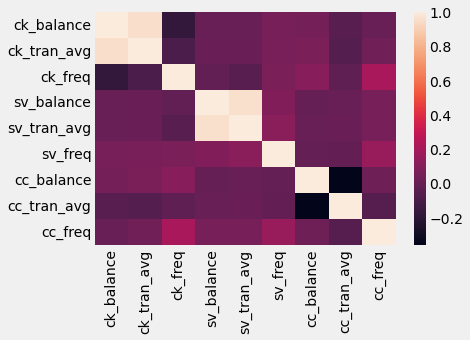

In [380]:
corr_mat = _scaled.corr()
sns.heatmap(data=corr_mat)

In [316]:
corr_mat

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
ck_balance,1.000000,0.956227,-0.177046,0.000002,-0.000593,0.048283,0.043545,-0.045757,0.001689
ck_tran_avg,0.956227,1.000000,-0.092597,0.008065,0.007212,0.056754,0.064022,-0.061401,0.032838
ck_freq,-0.177046,-0.092597,1.000000,-0.019195,-0.045056,0.066352,0.100784,-0.023629,0.206504
sv_balance,0.000002,0.008065,-0.019195,1.000000,0.959770,0.082297,-0.001981,0.001843,0.047690
sv_tran_avg,-0.000593,0.007212,-0.045056,0.959770,1.000000,0.111019,-0.000296,0.007970,0.050757
sv_freq,0.048283,0.056754,0.066352,0.082297,0.111019,1.000000,-0.007858,-0.011947,0.157514
cc_balance,0.043545,0.064022,0.100784,-0.001981,-0.000296,-0.007858,1.000000,-0.362512,0.020296
cc_tran_avg,-0.045757,-0.061401,-0.023629,0.001843,0.007970,-0.011947,-0.362512,1.000000,-0.057940
cc_freq,0.001689,0.032838,0.206504,0.047690,0.050757,0.157514,0.020296,-0.057940,1.000000


In [381]:
_x = _scaled.copy()
_x.head()

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
0,0.547845,0.542226,0.430418,1.368447,1.540175,0.887898,-0.098138,-0.039584,-1.031544
1,0.585144,0.576367,0.430418,-0.128101,-0.168007,-0.865264,0.431180,-0.092998,1.471978
2,0.226561,-0.929149,-2.965218,-0.651681,-0.787678,0.820468,-0.098138,-0.039584,-1.031544
3,0.023316,-0.464596,-1.726270,-0.128101,-0.168007,-0.865264,0.904169,-0.282021,0.081133
4,-1.239700,-1.093994,0.430418,-0.128101,-0.168007,-0.865264,-0.098138,-0.039584,-1.031544


In [382]:
_npca = 6
_pca = PCA(n_components=_npca)
_l = pd.DataFrame(_pca.fit_transform(_x), columns=['PC%s' %i for i in range(1,_npca+1)])
print(_l.shape)
_l.head()

(429, 6)


,PC1,PC2,PC3,PC4,PC5,PC6
0,-1.698502,-1.358724,0.217514,-0.121015,-0.323736,1.311826
1,-0.506589,0.573723,-0.820130,0.483658,1.244325,-0.907214
2,0.451020,0.825118,1.424759,-1.249854,-2.570951,-0.818704
3,0.123607,0.292863,0.124683,-1.503642,-0.333092,-1.207657
4,1.695620,-0.569613,0.273328,-0.951737,0.443581,0.520139


In [383]:
_pca.explained_variance_ratio_.cumsum()

array([0.22480656, 0.44404684, 0.60240021, 0.73754557, 0.83672902,
       0.92287522])

In [384]:
_x_new = pd.DataFrame(_pca.inverse_transform(_l), columns=_x.columns)
_x_new.head()

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
0,0.512179,0.544566,0.286662,1.441049,1.450107,0.896199,0.243239,0.285541,-0.924299
1,0.556058,0.629894,0.533576,-0.120483,-0.163145,-0.869516,0.170092,-0.340651,1.389559
2,-0.199307,-0.470055,-2.839981,-0.766221,-0.657970,0.810451,-0.492053,-0.406748,-1.160087
3,-0.130699,-0.251541,-1.480326,-0.140524,-0.125823,-0.876569,0.265280,-0.886632,-0.121469
4,-1.179385,-1.176927,0.336278,-0.137933,-0.169556,-0.861385,0.147719,0.193055,-0.953607


<AxesSubplot:>

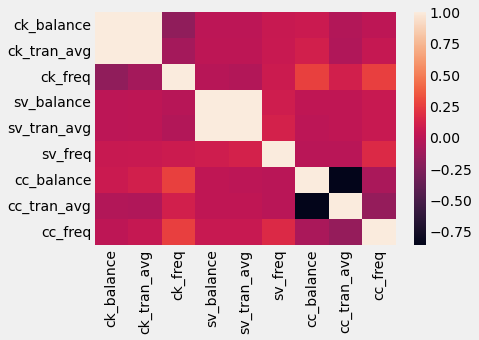

In [385]:
_corr1 = _x_new.corr()
sns.heatmap(_corr1)

In [322]:
_corr1

,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
ck_balance,1.000000,0.995897,-0.188653,-0.000944,-0.000308,0.048926,0.062112,-0.043684,0.004267
ck_tran_avg,0.995897,1.000000,-0.101806,0.008171,0.006716,0.057652,0.098311,-0.051846,0.039782
ck_freq,-0.188653,-0.101806,1.000000,-0.024232,-0.048145,0.069888,0.261153,0.101981,0.252130
sv_balance,-0.000944,0.008171,-0.024232,1.000000,0.999177,0.082691,0.011457,0.015057,0.052532
sv_tran_avg,-0.000308,0.006716,-0.048145,0.999177,1.000000,0.112812,0.002446,0.011949,0.052810
sv_freq,0.048926,0.057652,0.069888,0.082691,0.112812,1.000000,-0.014642,-0.018856,0.158317
cc_balance,0.062112,0.098311,0.261153,0.011457,0.002446,-0.014642,1.000000,-0.863893,-0.082046
cc_tran_avg,-0.043684,-0.051846,0.101981,0.015057,0.011949,-0.018856,-0.863893,1.000000,-0.167390
cc_freq,0.004267,0.039782,0.252130,0.052532,0.052810,0.158317,-0.082046,-0.167390,1.000000


<AxesSubplot:>

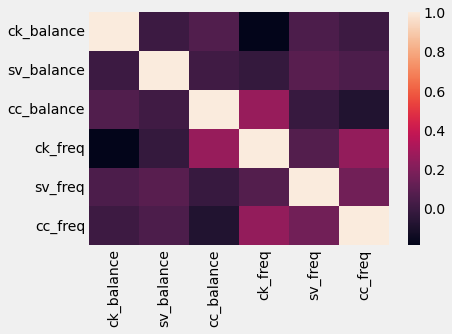

In [386]:
df = _x_new[['ck_balance', 'sv_balance', 'cc_balance', 'ck_freq', 'sv_freq', 'cc_freq']].copy()
corr2 =df.corr()
sns.heatmap(data=corr2)

In [387]:
corr2

,ck_balance,sv_balance,cc_balance,ck_freq,sv_freq,cc_freq
ck_balance,1.000000,-0.000944,0.062112,-0.188653,0.048926,0.004267
sv_balance,-0.000944,1.000000,0.011457,-0.024232,0.082691,0.052532
cc_balance,0.062112,0.011457,1.000000,0.261153,-0.014642,-0.082046
ck_freq,-0.188653,-0.024232,0.261153,1.000000,0.069888,0.252130
sv_freq,0.048926,0.082691,-0.014642,0.069888,1.000000,0.158317
cc_freq,0.004267,0.052532,-0.082046,0.252130,0.158317,1.000000


In [325]:
# df.drop(['sv_freq'], axis=1, inplace=True)
# corr3 =df.corr()
# sns.heatmap(data=corr3)

In [326]:
# corr3

In [327]:
# df.drop(['ck_freq'], axis=1, inplace=True)
# corr4 =df.corr()
# sns.heatmap(data=corr4)

In [328]:
# l_col = ['ck_spend', 'sv_spend', 'cc_spend', 'cc_freq']
# l_col = ['ck_balance', 'sv_balance', 'cc_balance', 'cc_freq']
# df = df[l_col]
# df = merge.copy()

In [329]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    # plt.grid()
    plt.show()

In [330]:
def plot_wcss(X, max_clusters = 10):
    wcss = []
    for k in range(1, max_clusters +1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, algorithm='full')
        km.fit(X)
        wcss.append(km.inertia_)
    plt.figure(figsize=(9, 6))
    plt.plot(range(1,max_clusters +1), wcss, marker='o', linewidth=2, color='r')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1, 11))
    plt.ylabel('WCSS')
    plt.show() 

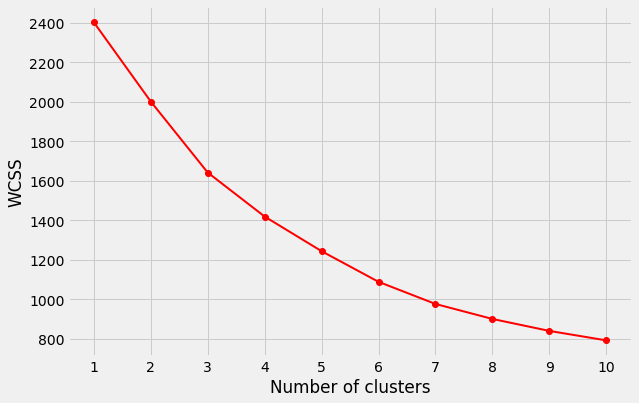

In [388]:
plot_wcss(df)

For n_clusters = 2 The average silhouette_score is : 0.23360429798138008
For n_clusters = 3 The average silhouette_score is : 0.2711455024604028
For n_clusters = 4 The average silhouette_score is : 0.2950467369652113
For n_clusters = 5 The average silhouette_score is : 0.269774225234113


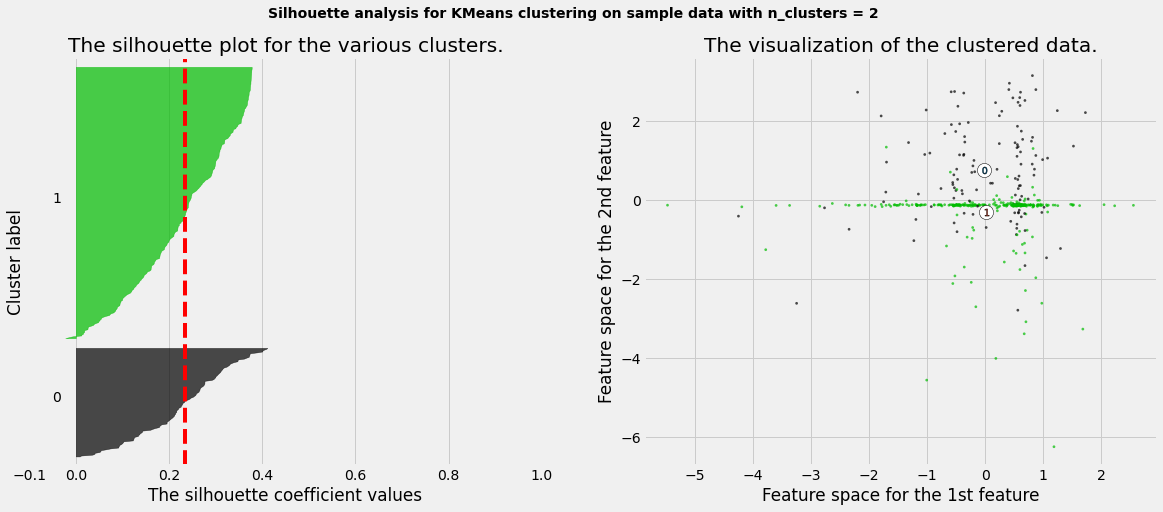

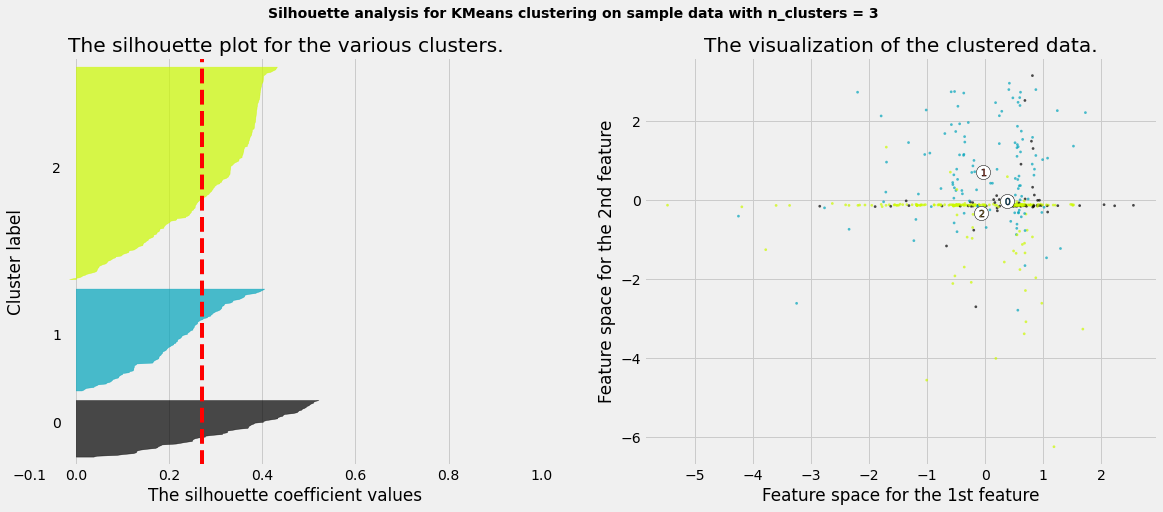

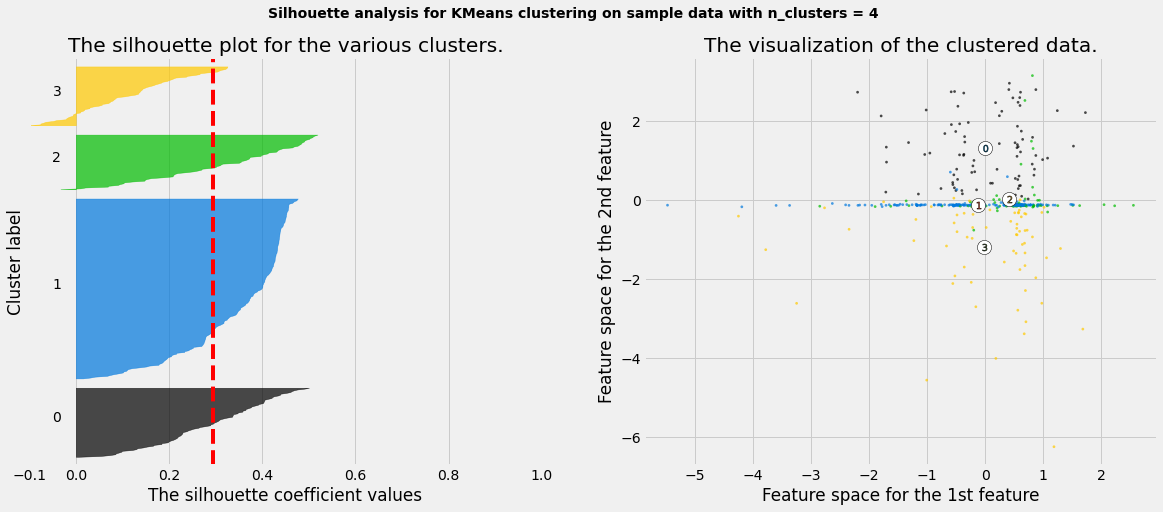

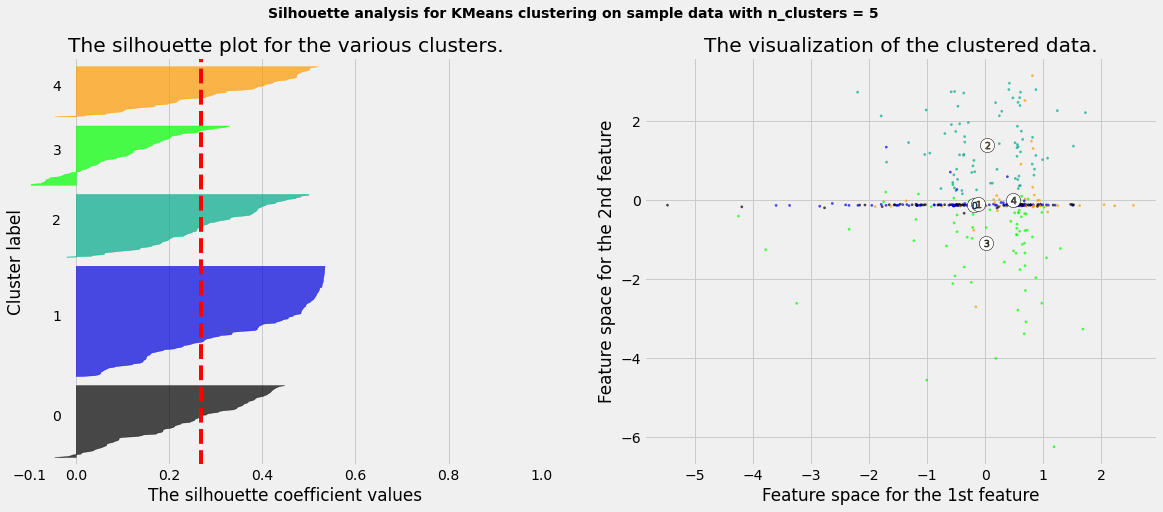

In [389]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# range_n_clusters = [2, 3, 4, 5]

for n_clusters in range(2, 6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.iloc[:, 0], df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [390]:
N_c = 4
km = KMeans(n_clusters=N_c, init='k-means++', n_init=100, max_iter=5000, algorithm='full')
clusters = km.fit_predict(df)
df["label"] = clusters
print(clusters.shape, clusters[:10])

(429,) [2 1 0 0 1 3 1 0 0 0]


In [391]:
df_c = []
for i in range(N_c):
    df_c.append(df[df.label == i].drop('label', axis=1))
    # df_c.append(df_dum[dum_scaled.label == i]) #.drop('label', axis=1))
    # df_c[i] = (df_c[i] - df_c[i].min()) / (df_c[i].max() - df_c[i].min())
    # df_c[i] = (df_c[i] - df_c[i].mean()) / df_c[i].std()

In [393]:
colors = ['orange', 'royalblue', 'green', 'darkviolet', 'black', 'brown']

# df_c[0]

In [394]:
fig = go.Figure()

for i in range(len(df_c)):
  rat = [*df_c[i].mean().values, df_c[i].mean().values[0]]
  cat = [*df_c[i].columns.values, df_c[i].columns.values[0]]
# fig = px.line_polar(data_frame=df_c1, r=df_c1.mean().values, theta=df_c1.columns.values, line_close=True)
  fig.add_trace(go.Scatterpolar(
      r=rat,
      theta=cat,
    #   fill='toself',
      name=f'Cluster{i+1}',
      line={'color': colors[i]}
  )
)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      # autorange=False
    )),
  showlegend=True,
  width=800, height=600
)
fig.show()

In [395]:
N_pca = 5
pca = PCA(n_components=N_pca)
x_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC%s' %i for i in range(1,N_pca+1)])
print(x_pca.shape)
x_pca

(429, 5)


,PC1,PC2,PC3,PC4,PC5
0,0.619589,-1.029100,-0.518849,0.471726,-1.510111
1,0.003356,0.365188,-0.404434,-1.647983,0.659971
2,-2.159503,-1.346959,1.009567,1.845207,0.605480
3,-1.986824,0.000872,-0.042017,-0.007396,0.275247
4,-0.686652,1.469158,-0.037587,0.666758,-0.477112
...,...,...,...,...,...
424,-0.006189,0.153538,-0.458871,-1.757563,0.987575
425,-0.352192,0.879432,-0.344405,-0.371055,0.453512
426,1.156906,-0.131068,0.003477,-0.092639,-1.220349
427,-0.688500,1.457219,-0.031804,0.654822,-0.480006


In [396]:
pca.explained_variance_ratio_.cumsum()

array([0.30157428, 0.47694563, 0.63446969, 0.77379223, 0.91129637])

In [397]:
def plot_clusters_pca(X, clusters, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(clusters):
        x = X.iloc[clusters == cluster, 0]
        y = X.iloc[clusters == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    c=colors[cluster],
                    label=f'cluster {cluster+1}',
                    alpha=0.75
        )

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids'
        )
    plt.xlabel('PC1', size=16)
    plt.ylabel('PC2', size=16)
    plt.legend()
    # plt.grid()
    plt.show()

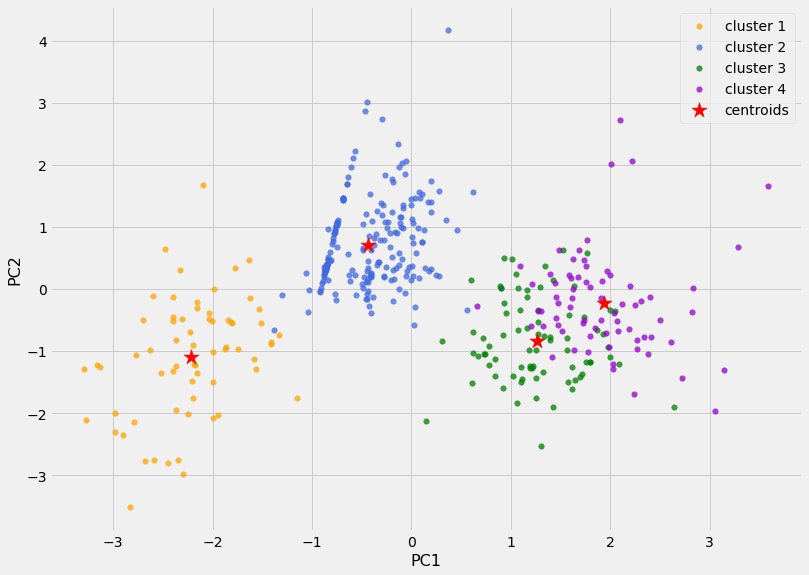

In [398]:
plt.figure(figsize=(12, 9))
plt.style.use('fivethirtyeight')
plot_clusters_pca(X=x_pca, clusters=df['label'].values, plt_cluster_centers=True)
plt.show()

### Plus demographic info

In [399]:
_cust = pd.read_csv('data/twm_customer.csv', sep=';')
df_cust = _cust.drop(['name_prefix', 'first_name', 'last_name'], axis=1)
df_cust = df_cust.drop(['street_nbr', 'street_name', 'postal_code', 'city_name', 'state_code'], axis=1)
df_cust = pd.get_dummies(data=df_cust, columns=df_cust.dtypes[df_cust.dtypes == 'object'].index.values)
df_cust.columns = df_cust.columns.str.strip()
df_cust.drop(['gender_M'], axis=1, inplace=True)
df_cust.drop(df_cust[df_cust.age < 18].index, axis=0, inplace=True)
df_cust.rename(columns={'gender_F': 'gender'}, inplace=True)
df_cust.reset_index(drop=True, inplace=True)
print(df_cust.shape)
df_cust.tail()

(645, 7)


,cust_id,income,age,years_with_bank,nbr_children,marital_status,gender
640,1363324,14795,36,6,1,4,1
641,1362895,26387,56,6,1,2,0
642,1362569,61300,50,0,2,2,0
643,1363364,15100,37,7,0,2,1
644,1363303,17875,18,3,0,1,1


In [400]:
print(_merge.shape)
_merge.head()

(468, 10)


,cust_id,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq
0,1362480,-244.99,-2.474646,99.0,480.88,18.550769,26.0,0.00,0.000000,0.0
1,1362484,-2518.14,-25.435758,99.0,1927.41,58.474545,33.0,-909.06,16.797636,55.0
2,1362485,-164.29,-1.659495,99.0,0.00,0.000000,0.0,817.62,-10.572639,72.0
3,1362486,-940.12,-37.604800,25.0,-168.24,-6.729600,25.0,0.00,0.000000,0.0
4,1362487,-1379.86,-26.513269,52.0,0.00,0.000000,0.0,1548.23,-47.987188,32.0


In [401]:
_df_all = _merge.merge(right=df_cust, on='cust_id', how='left', indicator=True)
print(_df_all.shape)

(468, 17)


In [402]:
_df_all.isnull().describe()

,cust_id,ck_balance,ck_tran_avg,ck_freq,sv_balance,sv_tran_avg,sv_freq,cc_balance,cc_tran_avg,cc_freq,income,age,years_with_bank,nbr_children,marital_status,gender,_merge
count,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468
unique,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,468,468,468,468,468,468,468,468,468,468,438,438,438,438,438,438,468


In [403]:
_df_all.drop(_df_all[_df_all.isnull().any(axis=1)].index, axis=0, inplace=True)
_df_all.drop(['_merge'], axis=1, inplace=True)
_df_all.drop(['cust_id'], axis=1, inplace=True)
print(_df_all.shape)

(438, 15)


<AxesSubplot:>

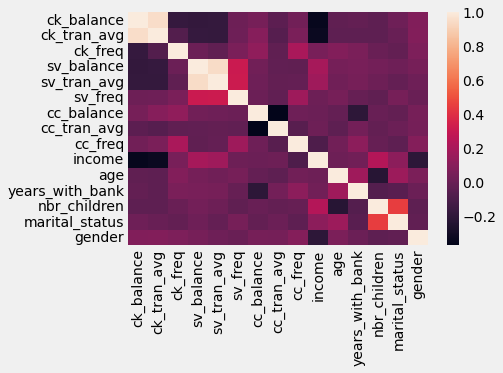

In [404]:
_corr1 = _df_all.corr()
sns.heatmap(_corr1)

In [408]:
_df = _df_all[
    [
        'ck_balance', 'ck_freq', 'sv_balance', 'sv_freq', 'cc_balance', 'cc_freq', 'income', 'age', 'years_with_bank', 'marital_status', 'gender'
    ]
].copy()

<AxesSubplot:>

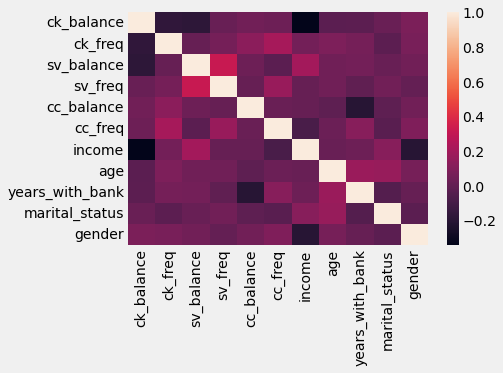

In [406]:
_corr2 = _df.corr()
sns.heatmap(_corr2)

In [407]:
_corr2

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
ck_balance,1.000000,-0.172760,-0.183264,0.011872,0.045835,0.029043,-0.345925,-0.030163,-0.021632,0.018340,0.075282
ck_freq,-0.172760,1.000000,0.008374,0.057371,0.122470,0.207435,0.052173,0.081431,0.055056,-0.020505,0.064473
sv_balance,-0.183264,0.008374,1.000000,0.312700,0.028709,-0.029132,0.195727,0.039808,0.049638,0.015446,0.044168
sv_freq,0.011872,0.057371,0.312700,1.000000,0.009544,0.167660,0.010632,0.042316,-0.009861,0.045002,0.003411
cc_balance,0.045835,0.122470,0.028709,0.009544,1.000000,0.017000,0.008196,-0.015919,-0.209024,-0.018961,0.043583
cc_freq,0.029043,0.207435,-0.029132,0.167660,0.017000,1.000000,-0.086895,0.027246,0.116492,-0.033317,0.085752
income,-0.345925,0.052173,0.195727,0.010632,0.008196,-0.086895,1.000000,0.014451,0.030571,0.116482,-0.205544
age,-0.030163,0.081431,0.039808,0.042316,-0.015919,0.027246,0.014451,1.000000,0.173001,0.163565,0.061869
years_with_bank,-0.021632,0.055056,0.049638,-0.009861,-0.209024,0.116492,0.030571,0.173001,1.000000,-0.049677,0.008617
marital_status,0.018340,-0.020505,0.015446,0.045002,-0.018961,-0.033317,0.116482,0.163565,-0.049677,1.000000,-0.026551


In [409]:
_df.drop(_df[_df['sv_balance'] > 1000].index, axis=0, inplace=True)
print(_df.shape)

(400, 11)


<AxesSubplot:>

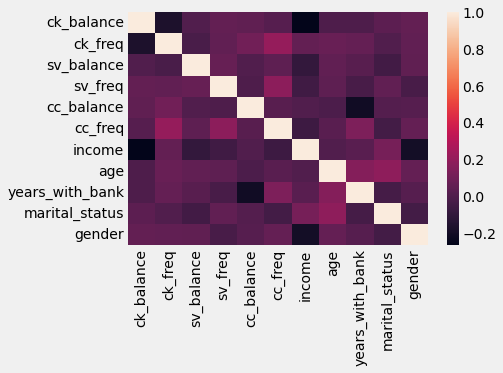

In [410]:
_corr3 = _df.corr()
sns.heatmap(_corr3)

In [411]:
_corr3

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
ck_balance,1.000000,-0.175701,-0.001188,0.054346,0.043452,0.013548,-0.270084,-0.009298,-0.009394,0.034725,0.053935
ck_freq,-0.175701,1.000000,-0.026974,0.052037,0.097926,0.202018,0.052412,0.067562,0.061127,0.000134,0.049518
sv_balance,-0.001188,-0.026974,1.000000,0.066321,0.000451,0.039899,-0.097994,0.051895,0.019635,-0.048758,0.044255
sv_freq,0.054346,0.052037,0.066321,1.000000,-0.008572,0.176544,-0.051976,0.039396,-0.030113,0.049271,-0.027287
cc_balance,0.043452,0.097926,0.000451,-0.008572,1.000000,0.020703,-0.001216,-0.016666,-0.214576,0.012639,0.016136
cc_freq,0.013548,0.202018,0.039899,0.176544,0.020703,1.000000,-0.061891,0.025549,0.132968,-0.042183,0.062039
income,-0.270084,0.052412,-0.097994,-0.051976,-0.001216,-0.061891,1.000000,0.001658,0.026921,0.114942,-0.204429
age,-0.009298,0.067562,0.051895,0.039396,-0.016666,0.025549,0.001658,1.000000,0.154873,0.183598,0.061830
years_with_bank,-0.009394,0.061127,0.019635,-0.030113,-0.214576,0.132968,0.026921,0.154873,1.000000,-0.039111,0.017668
marital_status,0.034725,0.000134,-0.048758,0.049271,0.012639,-0.042183,0.114942,0.183598,-0.039111,1.000000,-0.044033


In [413]:
sclr = StandardScaler()
# dum_scaled = pd.DataFrame(sclr.fit_transform(X=df_dum), columns=df_dum.columns)
_scaled = pd.DataFrame(sclr.fit_transform(X=_df), columns=_df.columns.values)
_scaled.head()

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
0,0.556086,0.428545,1.366757,0.896318,-0.094997,-1.041805,1.231413,-0.757080,-0.309851,-0.059019,-1.187282
1,0.592669,0.428545,-0.111902,-0.854237,0.419303,1.454159,-0.104165,-1.223154,0.059019,-1.085433,0.842260
2,0.240966,-2.946005,-0.629224,0.828989,-0.094997,-1.041805,-0.671975,1.748070,0.796761,0.967395,0.842260
3,0.041621,-1.714750,-0.111902,-0.854237,0.878873,0.067512,-0.865965,1.456774,-1.047593,-0.059019,-1.187282
4,-1.197163,0.428545,-0.111902,-0.854237,-0.094997,-1.041805,-0.843327,1.806329,1.165631,-0.059019,0.842260


In [414]:
_x = _scaled.copy()
_x.head()

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
0,0.556086,0.428545,1.366757,0.896318,-0.094997,-1.041805,1.231413,-0.757080,-0.309851,-0.059019,-1.187282
1,0.592669,0.428545,-0.111902,-0.854237,0.419303,1.454159,-0.104165,-1.223154,0.059019,-1.085433,0.842260
2,0.240966,-2.946005,-0.629224,0.828989,-0.094997,-1.041805,-0.671975,1.748070,0.796761,0.967395,0.842260
3,0.041621,-1.714750,-0.111902,-0.854237,0.878873,0.067512,-0.865965,1.456774,-1.047593,-0.059019,-1.187282
4,-1.197163,0.428545,-0.111902,-0.854237,-0.094997,-1.041805,-0.843327,1.806329,1.165631,-0.059019,0.842260


In [415]:
_npca = 10
_pca = PCA(n_components=_npca)
_l = pd.DataFrame(_pca.fit_transform(_x), columns=['PC%s' %i for i in range(1,_npca+1)])
print(_l.shape)
_l.head()

(400, 10)


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10
0,0.803209,0.409269,-0.284708,-0.181445,1.484052,-1.256020,0.332567,-0.034295,-0.506769,1.412168
1,-0.987020,0.041622,-0.967845,1.565920,-0.373164,0.822114,0.539186,-1.051011,0.375432,-0.139287
2,-0.709088,0.842931,2.320278,-1.950220,-0.248281,0.022659,-0.686977,0.934117,1.816068,-0.286390
3,0.011304,1.286994,0.210055,-1.092428,-0.187497,-0.421700,1.163966,0.854583,0.367024,-2.084077
4,0.035913,-0.953573,1.199558,0.036174,-2.143076,-0.492176,-0.088221,1.225697,-0.259521,-0.070512


In [416]:
_pca.explained_variance_ratio_.cumsum()

array([0.13218715, 0.2606044 , 0.37316681, 0.48082406, 0.57822055,
       0.66906441, 0.74747529, 0.81676681, 0.8832539 , 0.94458738])

In [417]:
_x_new = pd.DataFrame(_pca.inverse_transform(_l), columns=_x.columns)
_x_new.head()

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
0,0.098744,0.210791,1.278008,0.982424,0.191609,-1.093560,0.782649,-0.952029,0.037010,0.193496,-1.275340
1,0.345594,0.310905,-0.159848,-0.807719,0.574140,1.426199,-0.346606,-1.328474,0.246408,-0.949014,0.794687
2,0.875084,-2.644082,-0.506172,0.709599,-0.492386,-0.970045,-0.049751,2.018373,0.315826,0.617276,0.964355
3,0.256400,-1.612487,-0.070224,-0.894675,0.744275,0.091818,-0.655215,1.548327,-1.210488,-0.177606,-1.145928
4,-0.756712,0.638257,-0.026432,-0.937164,-0.371019,-0.991961,-0.411137,1.994079,0.831580,-0.302208,0.927066


<AxesSubplot:>

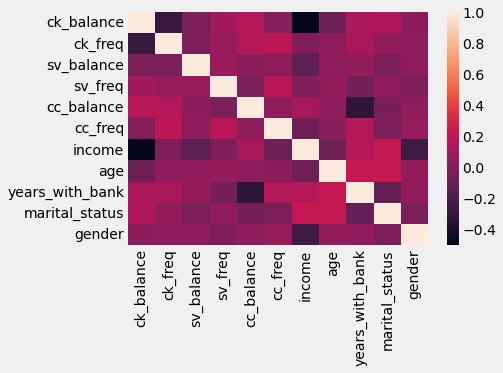

In [418]:
_corr1 = _x_new.corr()
sns.heatmap(_corr1)

In [419]:
_corr1

,ck_balance,ck_freq,sv_balance,sv_freq,cc_balance,cc_freq,income,age,years_with_bank,marital_status,gender
ck_balance,1.000000,-0.281269,-0.035703,0.092903,0.163500,-0.005208,-0.509822,-0.086779,0.129980,0.138984,0.024956
ck_freq,-0.281269,1.000000,-0.042845,0.067993,0.153935,0.197150,-0.025710,0.035909,0.127911,0.044590,0.035445
sv_balance,-0.035703,-0.042845,1.000000,0.072663,0.020864,0.036495,-0.140616,0.039209,0.045764,-0.032324,0.038441
sv_freq,0.092903,0.067993,0.072663,1.000000,-0.028669,0.180697,-0.024104,0.053323,-0.056044,0.033378,-0.021547
cc_balance,0.163500,0.153935,0.020864,-0.028669,1.000000,0.033287,0.110540,0.027857,-0.316289,-0.045943,0.036961
cc_freq,-0.005208,0.197150,0.036495,0.180697,0.033287,1.000000,-0.087006,0.018029,0.154367,-0.032928,0.058751
income,-0.509822,-0.025710,-0.140616,-0.024104,0.110540,-0.087006,1.000000,-0.072937,0.168388,0.226159,-0.256538
age,-0.086779,0.035909,0.039209,0.053323,0.027857,0.018029,-0.072937,1.000000,0.220827,0.230777,0.049428
years_with_bank,0.129980,0.127911,0.045764,-0.056044,-0.316289,0.154367,0.168388,0.220827,1.000000,-0.115094,0.043495
marital_status,0.138984,0.044590,-0.032324,0.033378,-0.045943,-0.032928,0.226159,0.230777,-0.115094,1.000000,-0.027601


In [420]:
# l_col = ['ck_spend', 'sv_spend', 'cc_spend', 'cc_freq']
l_col = ['income', 'age', 'sv_balance', 'cc_balance', 'cc_freq']
df = _x_new[l_col].copy()
# df = merge.copy()

<AxesSubplot:>

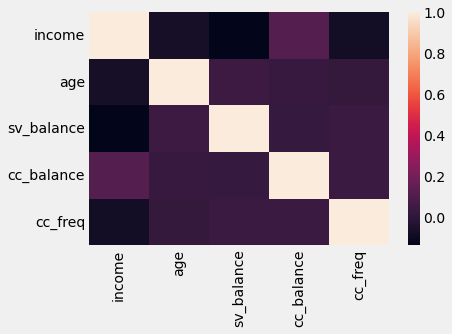

In [421]:
_corr4 = df.corr()
sns.heatmap(_corr4)

In [422]:
_corr4

,income,age,sv_balance,cc_balance,cc_freq
income,1.000000,-0.072937,-0.140616,0.110540,-0.087006
age,-0.072937,1.000000,0.039209,0.027857,0.018029
sv_balance,-0.140616,0.039209,1.000000,0.020864,0.036495
cc_balance,0.110540,0.027857,0.020864,1.000000,0.033287
cc_freq,-0.087006,0.018029,0.036495,0.033287,1.000000


In [423]:
def plot_clusters(X, y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(y_res):
        x = X.iloc[y_res == cluster,0]
        y = X.iloc[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    # plt.grid()
    plt.show()

In [424]:
def plot_wcss(X, max_clusters = 10):
    wcss = []
    for k in range(1, max_clusters +1):
        km = KMeans(n_clusters=k, init='k-means++', n_init=50, max_iter=500, algorithm='full')
        km.fit(X)
        wcss.append(km.inertia_)
    plt.figure(figsize=(9, 6))
    plt.plot(range(1,max_clusters +1), wcss, marker='o', linewidth=2, color='r')
    plt.xlabel('Number of clusters')
    plt.xticks(np.arange(1, 11))
    plt.ylabel('WCSS')
    plt.show() 

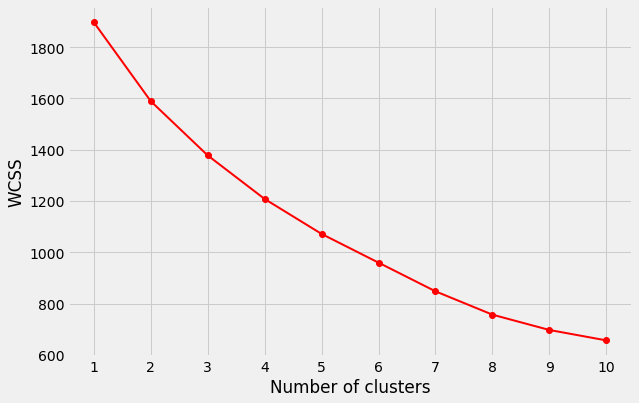

In [425]:
plot_wcss(df)

For n_clusters = 2 The average silhouette_score is : 0.1828992421295133
For n_clusters = 3 The average silhouette_score is : 0.19849789249235072
For n_clusters = 4 The average silhouette_score is : 0.19188696820109716
For n_clusters = 5 The average silhouette_score is : 0.22171293329820016


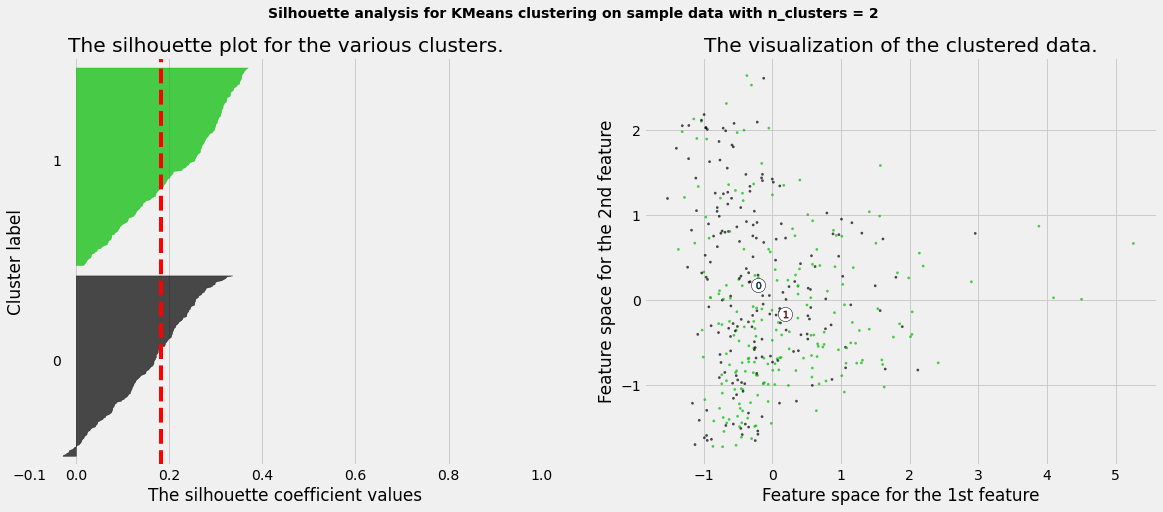

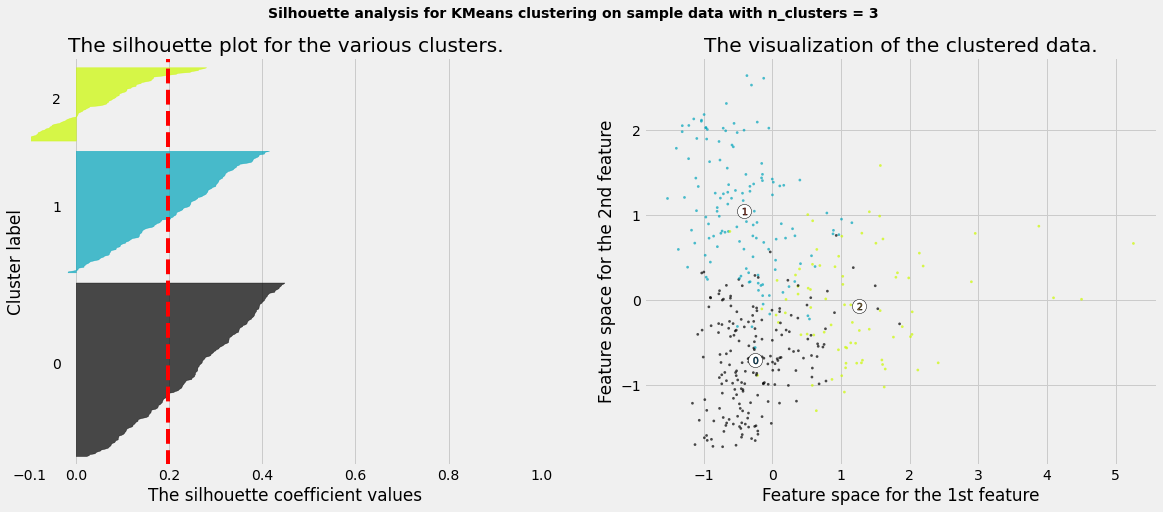

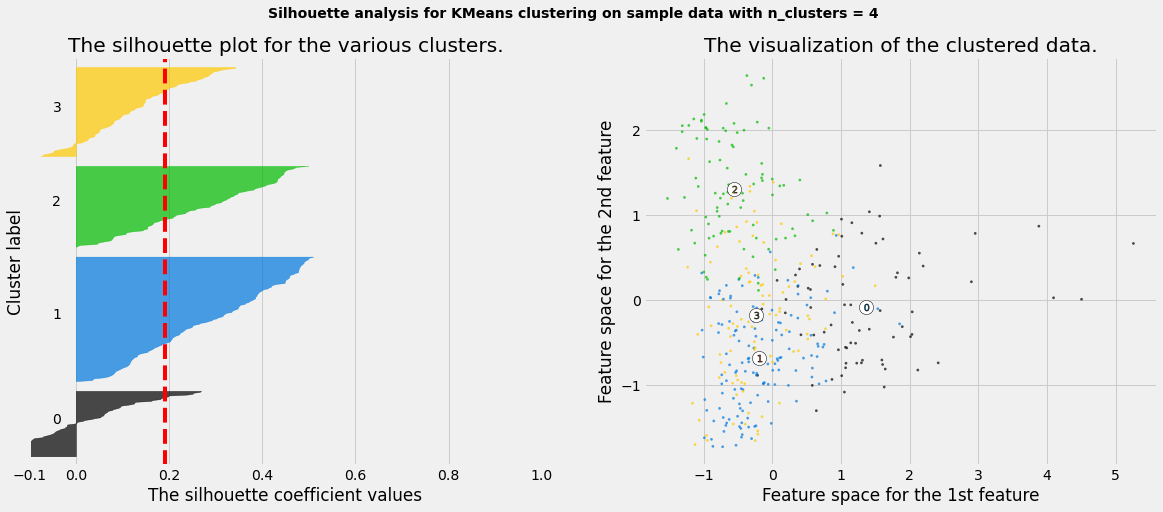

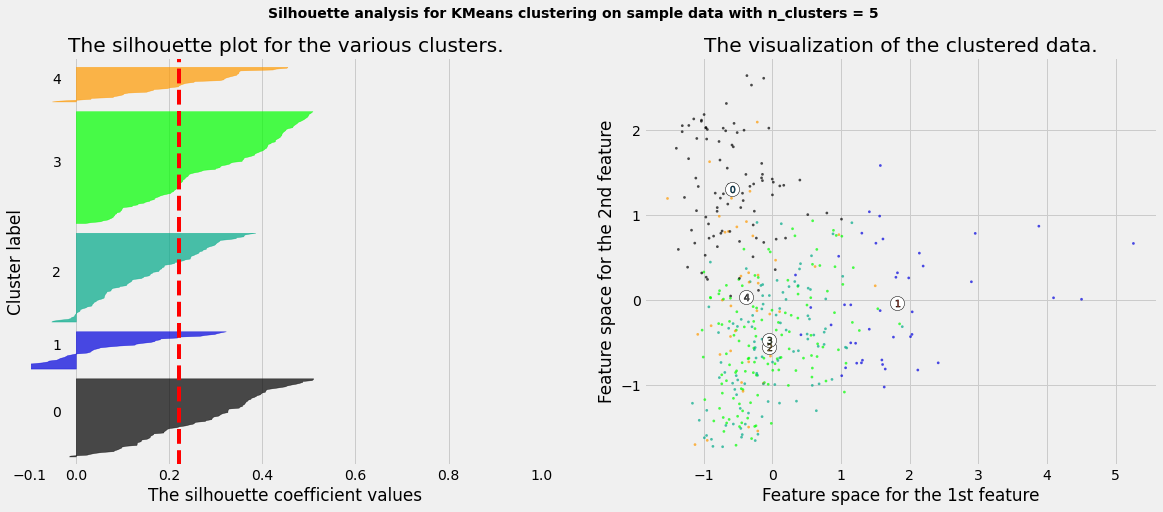

In [426]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# range_n_clusters = [2, 3, 4, 5]

for n_clusters in range(2, 6):
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        df.iloc[:, 0], df.iloc[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

In [427]:
N_c = 4
km = KMeans(n_clusters=N_c, init='k-means++', n_init=100, max_iter=5000, algorithm='full')
clusters = km.fit_predict(df)
df["label"] = clusters
print(clusters.shape, clusters[:10])

(400,) [0 2 1 1 1 3 3 1 3 0]


In [428]:
df_c = []
for i in range(N_c):
    df_c.append(df[df.label == i].drop('label', axis=1))
    # df_c.append(df_dum[dum_scaled.label == i]) #.drop('label', axis=1))
    # df_c[i] = (df_c[i] - df_c[i].min()) #/ (df_c[i].max() - df_c[i].min())
    # df_c[i] = pd.DataFrame(_sclr.fit_transform(df_c[i]), columns=df_c[i].columns)
    # df_c[i] += 1

In [429]:
colors = ['orange', 'royalblue', 'green', 'darkviolet', 'black', 'brown']

# df_c[0]

In [430]:
fig = go.Figure()

for i in range(len(df_c)):
  rat = [*df_c[i].mean().values, df_c[i].mean().values[0]]
  cat = [*df_c[i].columns.values, df_c[i].columns.values[0]]
# fig = px.line_polar(data_frame=df_c1, r=df_c1.mean().values, theta=df_c1.columns.values, line_close=True)
  fig.add_trace(go.Scatterpolar(
      r=rat,
      theta=cat,
    #   fill='toself',
      name=f'Cluster{i+1}',
      line={'color': colors[i]}
  )
)

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=False,
      # autorange=False
    )),
  showlegend=True,
  width=800, height=600
)
fig.show()

In [433]:
N_pca = 5
pca = PCA(n_components=N_pca)
x_pca = pd.DataFrame(pca.fit_transform(df), columns=['PC%s' %i for i in range(1,N_pca+1)])
print(x_pca.shape)
x_pca

(400, 5)


,PC1,PC2,PC3,PC4,PC5
0,-1.183629,0.570328,-0.524506,-1.778977,0.602675
1,0.895391,-0.345946,1.727012,-0.638988,-0.660169
2,-0.372529,0.033381,-1.705890,1.579929,0.201651
3,0.037872,-0.943331,-1.063356,0.760602,-0.875869
4,-0.543225,-0.393302,-1.809242,1.256155,0.131634
...,...,...,...,...,...
395,0.616359,-0.708433,1.856140,-0.083501,-0.208012
396,-0.539054,-0.529544,0.214972,0.518280,-0.443948
397,3.920697,1.685365,-1.181492,-1.714201,1.072332
398,-0.226390,0.226346,-1.562911,0.745134,0.378459


In [434]:
pca.explained_variance_ratio_.cumsum()

array([0.31209879, 0.50249176, 0.66415852, 0.82040238, 0.94758733])

In [373]:
def plot_clusters_pca(X, clusters, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    # plt.figure(figsize=(12, 9))
    for cluster in set(clusters):
        x = X.iloc[clusters == cluster, 0]
        y = X.iloc[clusters == cluster, 1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=30,
                    marker='o',
                    c=colors[cluster],
                    label=f'cluster {cluster+1}',
                    alpha=0.75
        )

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids'
        )
    plt.xlabel('PC1', size=16)
    plt.ylabel('PC2', size=16)
    plt.legend()
    # plt.grid()
    plt.show()

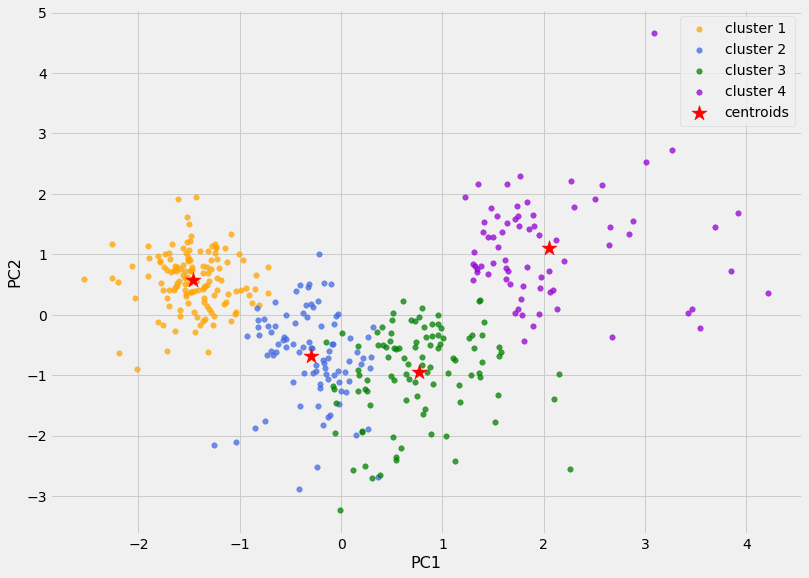

In [435]:
plt.figure(figsize=(12, 9))
plt.style.use('fivethirtyeight')
plot_clusters_pca(X=x_pca, clusters=df['label'].values, plt_cluster_centers=True)
plt.show()